## Original code

In [17]:
# Stiff Robertson's problem from chemical kinetics as in
# https://archimede.uniba.it/~testset/report/rober.pdf
import numpy as np
import matplotlib.pyplot as plt
import time

a = 0.04
b = 1.0e4
c = 3.0e7

# timestep, Tmax, tolearnce for Newton's solver
h = 1.0e-1
Tmax = 1.0e2 # up to 4.0e10
Nsteps = int(np.ceil(Tmax/h))
tol = 1.0e-14
itermax = 20

# initial condition
y0 = np.array([1.0,0.0,0.0])

# the right-hand side
def func(y): 
    dy = np.zeros(3)
    byz = b*y[1]*y[2]
    cy2 = c*y[1]*y[1]
    ax = a*y[0]
    dy[0] = -ax + byz
    dy[1] = ax - byz - cy2
    dy[2] = cy2
    return dy

# the Jacobian matrix for the right-hand side
def Jac(y):
    by = b*y[1]
    bz = b*y[2]
    c2y = 2*c*y[1]
    Jac = np.zeros((3,3))
    Jac[0,0] = -a
    Jac[0,1] = bz
    Jac[0,2] = by
    Jac[1,0] = a
    Jac[1,1] = -bz-c2y
    Jac[1,2] = -by
    Jac[2,1] = c2y
    return Jac


In [7]:
time_dirk2 = []
time_dirk3 = []
time_bdf = []

In [3]:
# DIRK2

def NewtonIterDIRK2(y,h,k,gamma):
    aux = y + h*gamma*k
    F = k - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k - np.linalg.solve(DF,F)

def DIRK2step(y,h):
    gamma = 1.0 - 1.0/np.sqrt(2)
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK2(y,h,k1,gamma)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    # print( np.linalg.norm(k1 - func(y + h*gamma*k1)))
    # print(j)
    k2 = k1
    y = y + h*(1-gamma)*k1
    for j in range(itermax):
        k2 = NewtonIterDIRK2(y,h,k2,gamma)
        aux = y + h*gamma*k2
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    # print( np.linalg.norm(k2 - func(aux)))
    # print(j)
    return aux


In [18]:
# solve Robertson's problem
sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0

start_time = time.time()

method_name = "DIRK2"
for j in range(Nsteps): # DIRK2
    sol[j+1,:] = DIRK2step(sol[j,:],h)

end_time = time.time()
t_cpu = end_time - start_time

time_dirk2.append(t_cpu)

print(f'method = {method_name:5}, h = {h}, CPUtime = {t_cpu:.6e}')
  

method = DIRK2, h = 0.1, CPUtime = 1.594648e-01


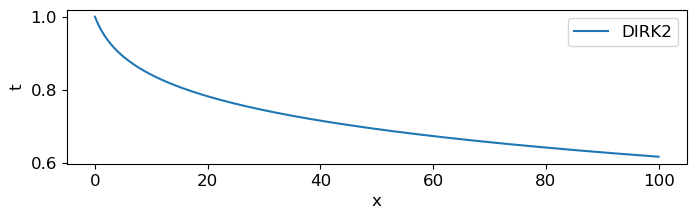

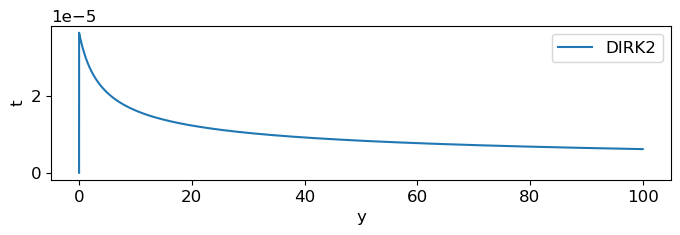

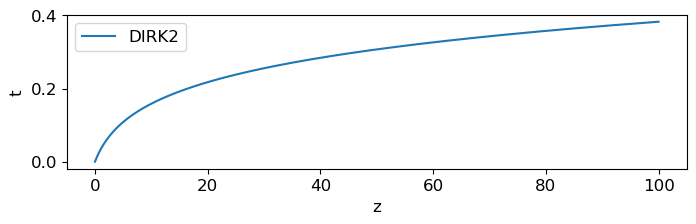

In [9]:
# plot the solution
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,0],label = "DIRK2")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,1],label = "DIRK2")
plt.xlabel("y")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,2],label = "DIRK2")
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")


## My Code
### DIRKo3

In [5]:
# DIRK3
def NewtonIterDIRK3(y,h,k,gamma):
    aux = y + h*gamma*k
    F = k - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k - np.linalg.solve(DF,F)


def DIRK3step(y,h):
    gamma = 1/2 + np.sqrt(3)/6
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK3(y,h,k1,gamma)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    k2 = k1
    y = y + h*0.5*k1
    for j in range(itermax):
        k2 = NewtonIterDIRK3(y,h,k2,gamma)
        aux = y + h*0.5*k2
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    return aux

In [19]:
# solve Robertson's problem

sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0

start_time = time.time()

method_name = "DIRKo3"
for j in range(Nsteps): # DIRK2
    sol[j+1,:] = DIRK3step(sol[j,:],h)

end_time = time.time()
t_cpu = end_time - start_time

time_dirk3.append(t_cpu)

print(f'method = {method_name:5}, CPUtime = {t_cpu:.6e}')
  

method = DIRKo3, CPUtime = 8.468270e-01


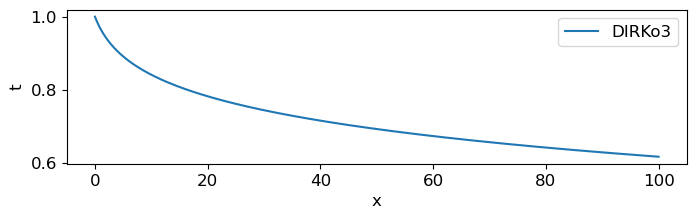

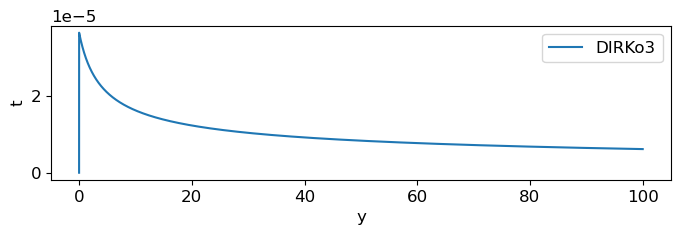

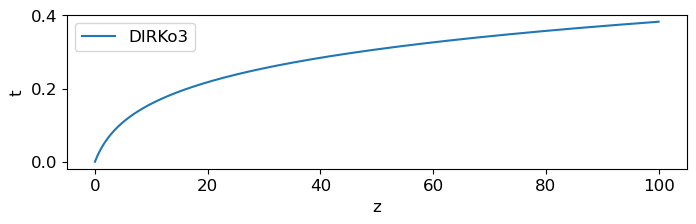

In [10]:
# plot the solution
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,0],label = "DIRKo3")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,1],label = "DIRKo3")
plt.xlabel("y")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,2],label = "DIRKo3")
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")

### BDF

In [11]:
# Two-step BDF using DIRK2 for the first time step
def BDF2step(y, h):
    # First time step using DIRK2
    y1 = DIRK2step(y, h)

    # Subsequent time step using BDF2
    gamma_bdf2 = 4.0/3.0
    f_y1 = func(y1)
    f_y = func(y)
    y2 = (4*y1 - y - h*gamma_bdf2*f_y1) / (3 - h*gamma_bdf2*f_y)

    return y2

In [20]:
# solve Robertson's problem

sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0

start_time = time.time()

method_name = "BDF2"
for j in range(Nsteps): # BDF2
    sol[j+1,:] = BDF2step(sol[j,:],h)

end_time = time.time()
t_cpu = end_time - start_time

time_bdf.append(t_cpu)

print(f'method = {method_name:5}, CPUtime = {t_cpu:.6e}')
  

method = BDF2 , CPUtime = 7.067451e-01


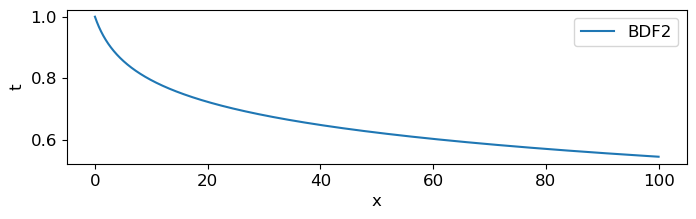

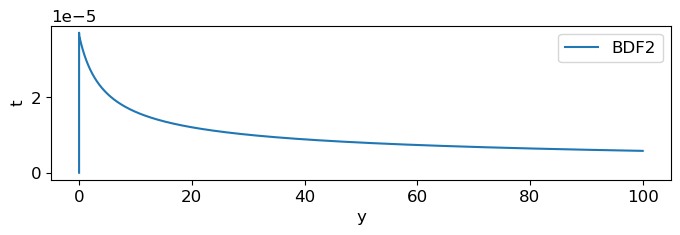

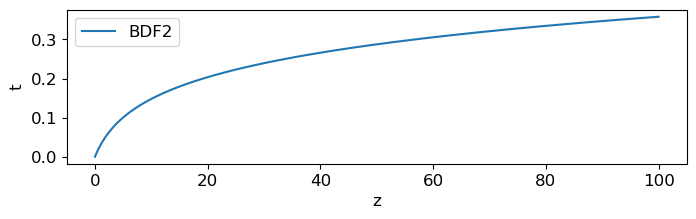

In [17]:
# plot the solution
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,0],label = "BDF2")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,1],label = "BDF2")
plt.xlabel("y")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,2],label = "BDF2")
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")

### Last part

In [ ]:
# BDF2 method
def BDF2step(initial_y, h):
    # First time step using DIRK2
    y_n1 = DIRK2step(initial_y, time_step)

    # Second time step using BDF2
    f_n1 = func(y_n1)
    y_n2 = DIRK2step(y_n1, time_step)
    f_n2 = func(y_n2)
    
    y_n = (4.0/3.0) * y_n1 - (1.0/3.0) * y_n2 - (2.0*h/3.0) * f_n2
    return y_n

# Two-step BDF using DIRK2 for the first time step
def BDF2step(y, h):
    # First time step using DIRK2
    y1 = DIRK2step(y, h)
    
    f_y1 = func(y1)
    y2 = DIRK2step(y_1, h)
    f_y2 = func(y2)
    # Subsequent time step using BDF2
    gamma_bdf2 = 4.0/3.0

    y_n = (4.0/3.0) * y_1 - (1.0/3.0) * y_2 - (2.0*h/3.0) * f_n2
    
    return y_n

In [ ]:
# solve Robertson's problem
sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0

start_time = time.time()

method_name = "BDF2"
sol[1,:] = DIRK2step(sol[0,:], h)
for j in range(Nsteps): # BDF2
    f_y0 = func(sol[j-1,:])
    y_j = DIRK2step(sol[j,:], h)
    f_yj = func(y_j)
    sol[j+1,:] = BDF2step(sol[j,:],h)

end_time = time.time()
t_cpu = end_time - start_time

print(f'method = {method_name:5}, CPUtime = {t_cpu:.6e}')

# plot the solution
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,0],label = "BDF2")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,1],label = "BDF2")
plt.xlabel("y")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,2],label = "BDF2")
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
#plt.xscale("log")

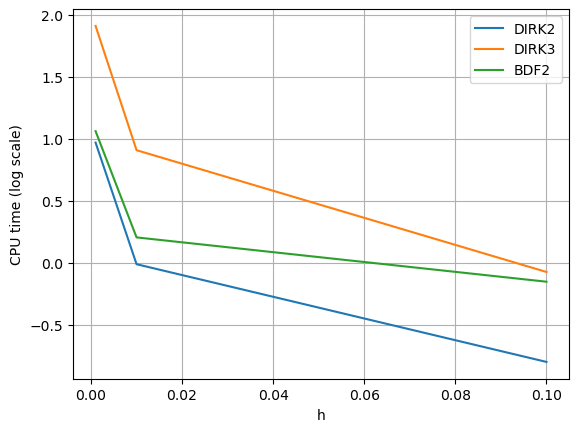

In [26]:
plt.plot([0.001, 0.01, 0.1], np.log10(time_dirk2), label="DIRK2")
plt.plot([0.001, 0.01, 0.1], np.log10(time_dirk3), label="DIRK3")
plt.plot([0.001, 0.01, 0.1], np.log10(time_bdf), label="BDF2")
plt.xlabel("h")
plt.ylabel("CPU time (log scale)")
plt.legend()
plt.grid()